In [1]:
## WADATI DIAGRAM 
# t_s - tp vs tp
import numpy as np 
import matplotlib.pyplot as plt 
from obspy.core import UTCDateTime
##
evtime=open('/home/gema/Desktop/resultados/informe/codes/picks/evtime.txt','r')
evtimeUTC=[]
for k in evtime:
    evtimeUTC.append(UTCDateTime(k))
## ptime
ptime=np.loadtxt('/home/gema/Desktop/resultados/informe/codes/picks/ptime.txt')
ptimeUTC=[]
for i in ptime:
    ptimeUTC.append(UTCDateTime(i))
## stime

stime=np.loadtxt('/home/gema/Desktop/resultados/informe/codes/picks/stime.txt')
stimeUTC=[]
for n in stime:
    stimeUTC.append(UTCDateTime(n))
## T_s - T_p = dt ; tp= t_p - evtime
dt=[]
tp=[]
for i in range(len(stimeUTC)):
    dt.append(stimeUTC[i]-ptimeUTC[i])
    tp.append(ptimeUTC[i]-evtimeUTC[i])
## t_p


In [ ]:
## PLOTTING
#color : color of the line
#alpha : opacity value of the line
#lw : line width
import seaborn as sns
fig=plt.figure()
sns.set_theme(style="darkgrid")
sns.regplot(x=tp, y=dt, line_kws={"color":"r","alpha":0.7,"lw":5});
plt.title('Wadati Diagram');
plt.legend(['data','Linear regression','Confidence interval'])
plt.text(x=-1,y=15,s='y=0.777 x - 0.7924 \n \n RMSE = 1.913 \n \n $R^2$ = 0.659')
plt.xlabel('P phase arrival time ($T_p$) \t [s]')
plt.ylabel('$T_s - T_p $ \t [s] ')

## obtenemos los valores de la regresion lineal
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(np.array(tp).reshape(-1,1), np.array(dt)) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

prediccion_entrenamiento = regresion_lineal.predict(np.array(tp).reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = np.array(dt), y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
r2 = regresion_lineal.score(np.array(tp).reshape(-1,1), np.array(dt))
print('Coeficiente de Determinación R2 = ' + str(r2))
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
fig.savefig('wadati.eps',format='eps')


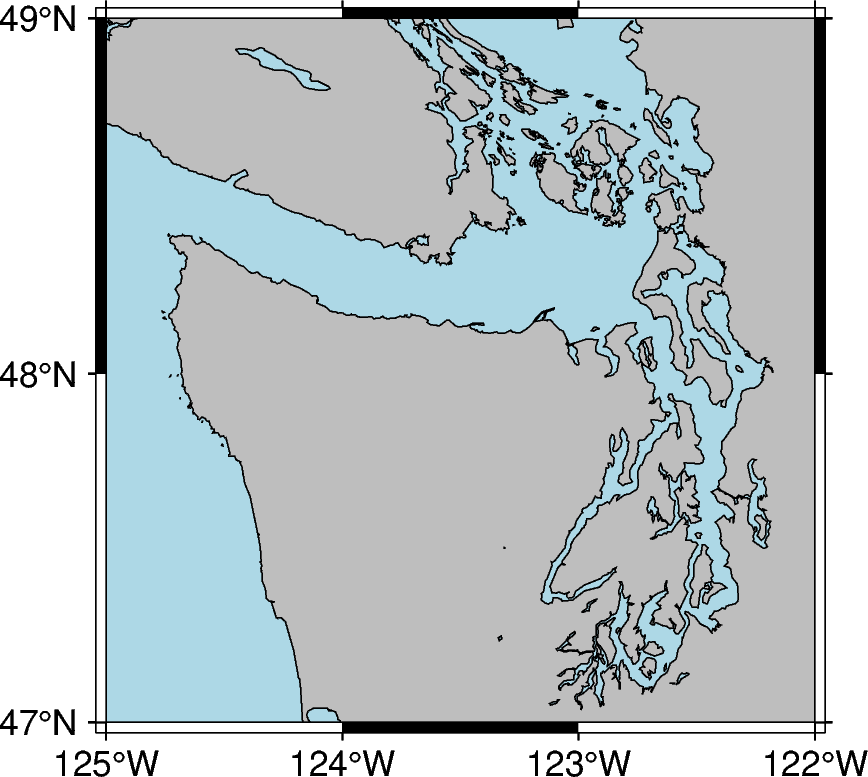

In [6]:
import pygmt

fig = pygmt.Figure()

# generate a basemap near Washington state showing coastlines, land, and water
fig.coast(
    region=[-125, -122, 47, 49],
    projection="M6c",
    land="grey",
    water="lightblue",
    shorelines=True,
    frame="a",
)
lat=np.loadtext()
# store focal mechanisms parameters in a dict

# pass the focal mechanism data to meca in addition to the scale and event
# location

fig.show()